### Import Dataset

In [284]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

### Load the Dataset

In [285]:
train=pd.read_csv('train_Loan_Pred.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [286]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [287]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [288]:
for col in train.columns:
    print( col ,'------>', train[col].nunique())

Loan_ID ------> 614
Gender ------> 2
Married ------> 2
Dependents ------> 4
Education ------> 2
Self_Employed ------> 2
ApplicantIncome ------> 505
CoapplicantIncome ------> 287
LoanAmount ------> 203
Loan_Amount_Term ------> 10
Credit_History ------> 2
Property_Area ------> 3
Loan_Status ------> 2


In [289]:
train.Dependents.unique() 

array(['0', '1', '2', '3+', nan], dtype=object)

In [290]:
train.Credit_History.unique()

array([ 1.,  0., nan])

In [291]:
train.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [292]:
train.Loan_Amount_Term.mean(),train.Loan_Amount_Term.median(),train.Loan_Amount_Term.mode()

(342.0,
 360.0,
 0    360.0
 Name: Loan_Amount_Term, dtype: float64)

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

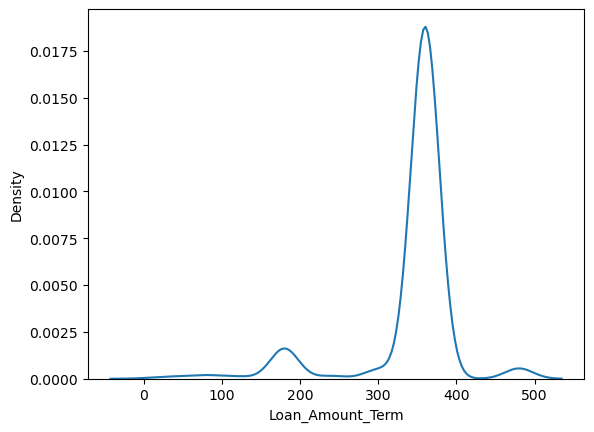

In [293]:
sns.kdeplot(train.Loan_Amount_Term )

In [294]:
train.CoapplicantIncome.unique()[0:5]

array([   0., 1508., 2358., 4196., 1516.])

In [295]:
train.CoapplicantIncome.mean(),train.CoapplicantIncome.median(),train.CoapplicantIncome.mode()

(1621.2457980271008,
 1188.5,
 0    0.0
 Name: CoapplicantIncome, dtype: float64)

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

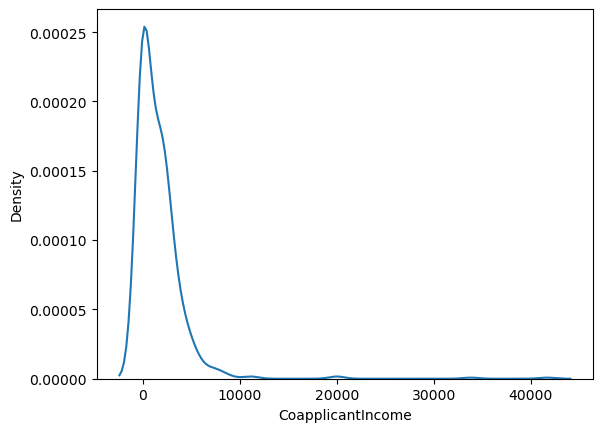

In [296]:
sns.kdeplot(train.CoapplicantIncome )

In [297]:
train.Loan_Status.value_counts(normalize=True)
                    # or 
#train.Loan_Status.value_counts()/train.shape[0]

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

### Identifying and Handling Null Values

In [298]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [299]:
train.Gender.mode().values[0]      # mean or median single value dete hai jabki mode series deta hai isliye .values[0] sath me likha 

'Male'

In [300]:
cat_col = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
for col in cat_col:
    val=train[col].mode().values[0]
    train[col]=train[col].fillna(val)

In [301]:
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='LoanAmount', ylabel='Density'>

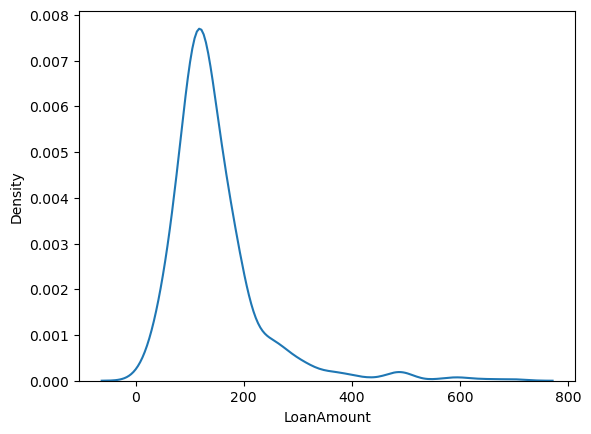

In [302]:
sns.kdeplot(train.LoanAmount)

In [303]:
train.LoanAmount.mean(),train.LoanAmount.median()    # see that mean and median gives single values 

(146.41216216216216, 128.0)

#### In business analytics, median is often the safer choice for missing imputation of continuous numeric value due to the  skewed data. However, for normally distributed or cleaned data, the mean is acceptable.

In [304]:
train['LoanAmount']=train['LoanAmount'].fillna(train.LoanAmount.median())

In [305]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outlier Handling


 Box Plot for ApplicantIncome


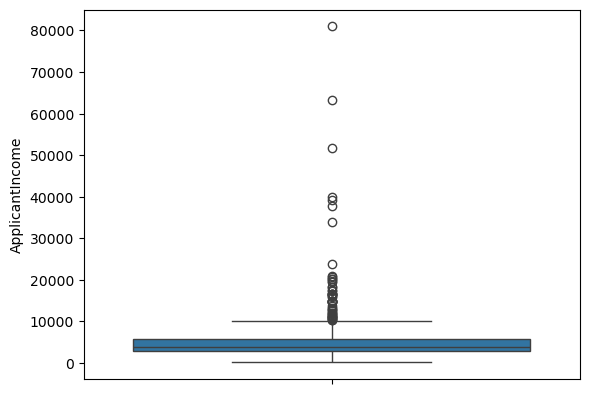


 Box Plot for CoapplicantIncome


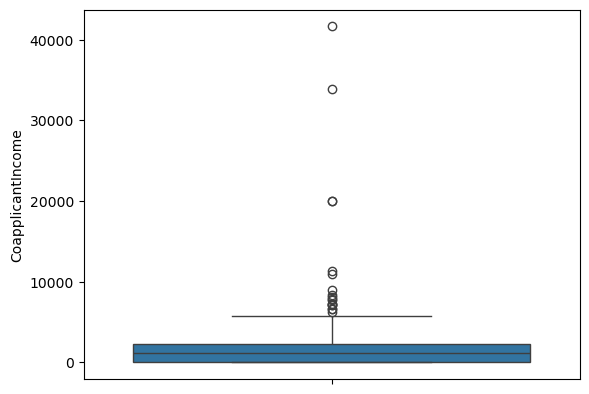


 Box Plot for LoanAmount


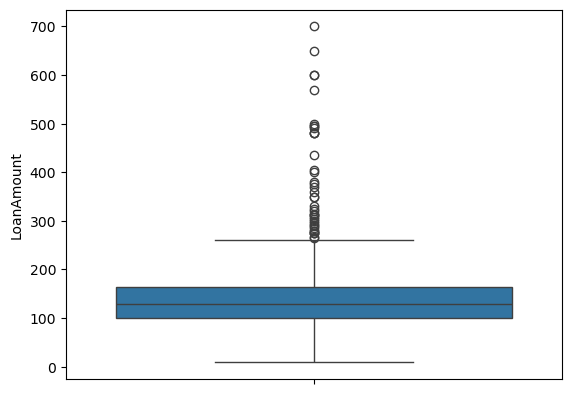


 Box Plot for Loan_Amount_Term


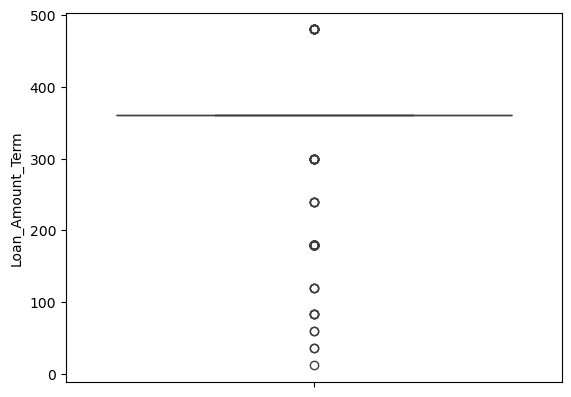

In [306]:
# method for outlier detection 
num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
for col in num_col:
    print(f'\n Box Plot for {col}')
    sns.boxplot(train[col])
    plt.show()
  

In [307]:
#method 1  for outliers detection.
def outliers_det(x):
    q3=x.quantile(0.75)
    q1=x.quantile(0.25)
    iqr=q3-q1
    lc=q1-1.5*iqr
    uc=q3+1.5*iqr
    n_outliers=((x<lc) | (x>uc)).sum()
    perc_outliers=n_outliers*100/x.shape[0]
    return pd.Series([x.shape[0],x.count(),lc,uc,n_outliers, perc_outliers],index=['n_total','n','lc','uc','n_outliers','perc_outliers'])

In [308]:
train.loc[:,['LoanAmount','CoapplicantIncome','ApplicantIncome']].apply(outliers_det) 

,LoanAmount,CoapplicantIncome,ApplicantIncome
n_total,614.000000,614.000000,614.000000
n,614.000000,614.000000,614.000000
lc,3.500000,-3445.875000,-1498.750000
uc,261.500000,5743.125000,10171.250000
n_outliers,41.000000,18.000000,50.000000
perc_outliers,6.677524,2.931596,8.143322


In [309]:
#method 2   for outliers detection.
def outliers_det(x):
    q3 = x.quantile(0.75)
    q1 = x.quantile(0.25)
    iqr = q3 - q1
    lc = q1 - 1.5 * iqr  # Lower cutoff
    uc = q3 + 1.5 * iqr  # Upper cutoff
    n_outliers = ((x < lc) | (x > uc)).sum()
    perc_outliers = (n_outliers * 100) / x.shape[0]

    return f"Outliers: {n_outliers}, Percentage: {perc_outliers:.2f}%"  # Return instead of print

train.loc[:,['LoanAmount','CoapplicantIncome','ApplicantIncome']].apply(outliers_det)

LoanAmount           Outliers: 41, Percentage: 6.68%
CoapplicantIncome    Outliers: 18, Percentage: 2.93%
ApplicantIncome      Outliers: 50, Percentage: 8.14%
dtype: object

In [310]:
# train.loc[:,['LoanAmount','CoapplicantIncome','ApplicantIncome']].apply(outliers_det)

In [311]:
# method 3 
def get_ul_ll(df, col):
    q3=df[col].quantile(0.75)
    q1=df[col].quantile(0.25)
    iqr=q3-q1
    lc=q1-1.5*iqr
    uc=q3+1.5*iqr
    return(uc,lc)

In [312]:

num_col=['LoanAmount','CoapplicantIncome','ApplicantIncome']
for col in num_col:
    uc,lc= get_ul_ll(train, col)
    n_total=train[col].shape[0]
    n_outliers=train[(train[col]<lc) | (train[col]>uc)].shape[0]    #it returns the dataframe but we only want 
    perc_outliers=n_outliers*100 / n_total
    print(col)
    print(f'Upper_limit: {uc}, lower_limit: {lc}')
    print(f'Total values in {col} : {n_total}')
    print(f'Total_outliers: {n_outliers}')
    print(f'Percentage_outlirs: {perc_outliers:.2f} %')
    print('--------------------------------------------------------')



LoanAmount
Upper_limit: 261.5, lower_limit: 3.5
Total values in LoanAmount : 614
Total_outliers: 41
Percentage_outlirs: 6.68 %
--------------------------------------------------------
CoapplicantIncome
Upper_limit: 5743.125, lower_limit: -3445.875
Total values in CoapplicantIncome : 614
Total_outliers: 18
Percentage_outlirs: 2.93 %
--------------------------------------------------------
ApplicantIncome
Upper_limit: 10171.25, lower_limit: -1498.75
Total values in ApplicantIncome : 614
Total_outliers: 50
Percentage_outlirs: 8.14 %
--------------------------------------------------------


In [313]:
train=train[(train['LoanAmount']>=3.5) & (train['LoanAmount']<=261.5)]
train.reset_index(drop=True,inplace=True)

In [314]:
train.shape

(573, 13)

In [315]:
614-573

41

In [316]:
num_col=['LoanAmount','CoapplicantIncome','ApplicantIncome']
for col in num_col:
    uc,lc= get_ul_ll(train, col)
    n_total=train[col].shape[0]
    n_outliers=train[(train[col]<lc) | (train[col]>uc)].shape[0]    #it returns the dataframe but we only want 
    perc_outliers=n_outliers*100 / n_total
    print(col)
    print(f'Upper_limit: {uc}, lower_limit: {lc}')
    print(f'Total_outliers: {n_outliers}')
    print(f'Percentage_outlirs: {perc_outliers:.2f} %')
    print('------------------------------------------------')

LoanAmount
Upper_limit: 237.5, lower_limit: 17.5
Total_outliers: 20
Percentage_outlirs: 3.49 %
------------------------------------------------
CoapplicantIncome
Upper_limit: 5557.5, lower_limit: -3334.5
Total_outliers: 15
Percentage_outlirs: 2.62 %
------------------------------------------------
ApplicantIncome
Upper_limit: 8971.5, lower_limit: -952.5
Total_outliers: 44
Percentage_outlirs: 7.68 %
------------------------------------------------


### Categorical to Numeric

In [317]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [318]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [319]:
train = train.loc[:,'Gender':]
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [320]:
mapping_dict={}   #to save the mapping for preprocessing in test data
cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
for col in cat_col:
    le=LabelEncoder()
    train[col]=le.fit_transform(train[col])
    print(col,'-----> Encoding:',dict(zip(le.classes_,sorted(train[col].unique()))))
    all_mapping=dict(zip(le.classes_,sorted(train[col].unique())))
    mapping_dict.update(all_mapping)

Gender -----> Encoding: {'Female': 0, 'Male': 1}
Married -----> Encoding: {'No': 0, 'Yes': 1}
Dependents -----> Encoding: {'0': 0, '1': 1, '2': 2, '3+': 3}
Education -----> Encoding: {'Graduate': 0, 'Not Graduate': 1}
Self_Employed -----> Encoding: {'No': 0, 'Yes': 1}
Property_Area -----> Encoding: {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
Loan_Status -----> Encoding: {'N': 0, 'Y': 1}


In [321]:
mapping_dict

{'Female': 0,
 'Male': 1,
 'No': 0,
 'Yes': 1,
 '0': 0,
 '1': 1,
 '2': 2,
 '3+': 3,
 'Graduate': 0,
 'Not Graduate': 1,
 'Rural': 0,
 'Semiurban': 1,
 'Urban': 2,
 'N': 0,
 'Y': 1}

In [322]:
temp_mapping=pd.DataFrame(mapping_dict.items(),columns=['id','values'])
temp_mapping.to_csv('mapping_dict_train.csv',index=False)        # to save the mapping for future data mapping reference
temp_mapping

,id,values
0,Female,0
1,Male,1
2,No,0
3,Yes,1
4,0,0
5,1,1
6,2,2
7,3+,3
8,Graduate,0
9,Not Graduate,1


In [323]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [324]:
train.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

<Axes: >

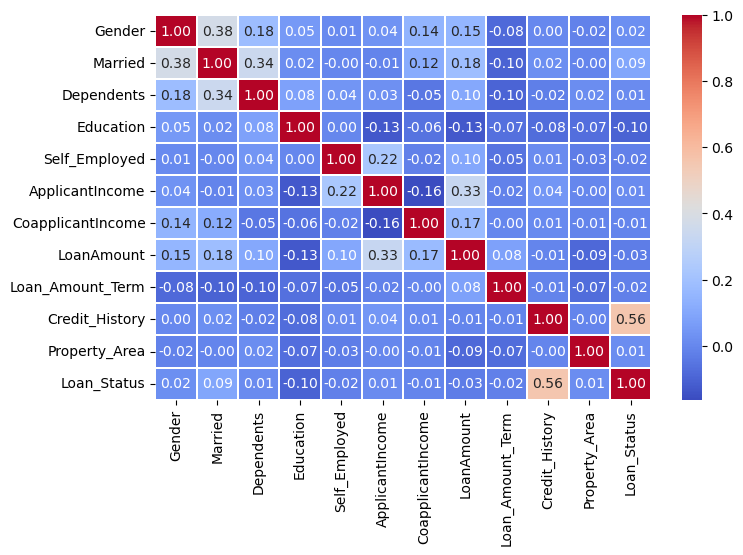

In [325]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidth=0.1)

### Standarization of dataset

In [326]:
x=train.loc[:,:'Property_Area'] # or train.iloc[:,:-1]
y=train['Loan_Status']

In [327]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ft=ss.fit_transform(x)   # it returns series so need to convert it into dataframe  
x_ft=pd.DataFrame(x_ft, columns = x.columns)
x_ft

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.479180,-1.350059,-0.718898,-0.549793,-0.382099,0.328911,-0.630154,-0.010433,0.271476,0.414462,1.224522
1,0.479180,0.740708,0.300727,-0.549793,-0.382099,-0.018351,0.012474,-0.010433,0.271476,0.414462,-1.326937
2,0.479180,0.740708,-0.718898,-0.549793,2.617120,-0.452565,-0.630154,-1.348463,0.271476,0.414462,1.224522
3,0.479180,0.740708,-0.718898,1.818865,-0.382099,-0.566948,0.374698,-0.183082,0.271476,0.414462,1.224522
4,0.479180,-1.350059,-0.718898,-0.549793,-0.382099,0.370330,-0.630154,0.270122,0.271476,0.414462,1.224522
...,...,...,...,...,...,...,...,...,...,...,...
568,-2.086897,-1.350059,-0.718898,-0.549793,-0.382099,-0.479995,-0.630154,-1.240557,0.271476,0.414462,-1.326937
569,0.479180,0.740708,2.339976,-0.549793,-0.382099,-0.149191,-0.630154,-1.909572,-2.506309,0.414462,-1.326937
570,0.479180,0.740708,0.300727,-0.549793,-0.382099,0.938677,-0.527879,2.687208,0.271476,0.414462,1.224522
571,0.479180,0.740708,1.320352,-0.549793,-0.382099,0.804545,-0.630154,1.262854,0.271476,0.414462,1.224522


In [328]:
ss

StandardScaler()

In [329]:
import pickle      

In [330]:
with open('Standard_scaler_train.pkl','wb') as file:
    ss=pickle.dump(ss,file)

### Train_Test_Split


In [331]:
from sklearn.model_selection import train_test_split

In [332]:
x_train, x_test, y_train, y_test = train_test_split(x_ft,y,test_size=0.2,random_state=67,stratify=y)

In [333]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((458, 11), (115, 11), (458,), (115,))

In [334]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [370]:
lr=LogisticRegression(penalty= 'l2',solver = 'lbfgs')
lr.fit(x_train,y_train)
lr

LogisticRegression()

In [339]:
# predictions on training set 
train_pred = lr.predict(x_train)
train_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [340]:
accuracy_score(y_train,train_pred)

0.8144104803493449

In [371]:
# predictions on validation set
pred=lr.predict(x_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [372]:
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, classification_report

In [373]:
accuracy_score(y_test,pred)* 100

83.47826086956522

In [374]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65        35
           1       0.82      0.97      0.89        80

    accuracy                           0.83       115
   macro avg       0.86      0.74      0.77       115
weighted avg       0.85      0.83      0.82       115



In [342]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [343]:
dt = DecisionTreeClassifier(max_depth = 7 )
dt.fit(x_train,y_train)
dt

DecisionTreeClassifier(max_depth=7)

In [344]:
dt_pred=dt.predict(x_test)
dt_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [345]:
accuracy_score(y_test,dt_pred)*100

83.47826086956522

In [346]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.86      0.54      0.67        35
           1       0.83      0.96      0.89        80

    accuracy                           0.83       115
   macro avg       0.85      0.75      0.78       115
weighted avg       0.84      0.83      0.82       115



In [347]:
from sklearn.tree import plot_tree

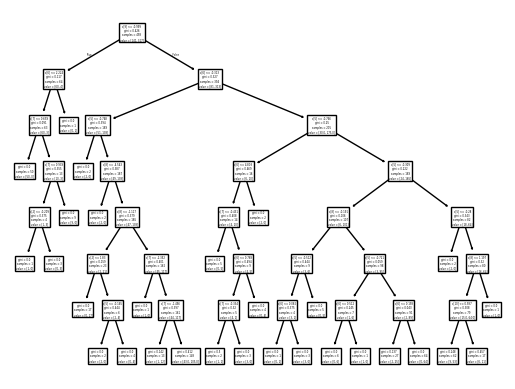

In [348]:
plot_tree(dt)
plt.show()

In [349]:
from sklearn.ensemble import RandomForestClassifier
 

In [350]:
params={
    "n_estimators":[10,20,40,80,100],
    "max_depth":[2,3,5]
}
rf_estimator=RandomForestClassifier(n_jobs=-1,oob_score=True,random_state=1024)

In [351]:
rf_model = GridSearchCV(estimator= rf_estimator, param_grid=params, cv = 5)
rf_model.fit(x_train, y_train)
rf_model

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1024),
             param_grid={'max_depth': [2, 3, 5],
                         'n_estimators': [10, 20, 40, 80, 100]})

In [352]:
rf_model.best_params_

{'max_depth': 2, 'n_estimators': 80}

In [353]:
rf_pred=rf_model.predict(x_test)
rf_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [354]:
accuracy_score(y_test,rf_pred)*100

83.47826086956522

In [355]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65        35
           1       0.82      0.97      0.89        80

    accuracy                           0.83       115
   macro avg       0.86      0.74      0.77       115
weighted avg       0.85      0.83      0.82       115



In [356]:
!pip install xgboost     

Defaulting to user installation because normal site-packages is not writeable


In [357]:
import xgboost as xgb 
from xgboost import XGBRFClassifier

In [358]:
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
     }
xgb_estimator = xgb.XGBClassifier(n_jobs = -1 )

In [359]:
xgb_model = GridSearchCV(estimator= xgb_estimator, param_grid= params, cv = 5)
xgb_model.fit(x_train,y_train)
xgb_model

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [360]:
xgb_model = xgb.XGBClassifier()  # create an instance of XGBClassifier before calling .fit()
xgb_model=xgb_model.fit(x_train,y_train)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [361]:
xgb_pred=xgb_model.predict(x_test)
xgb_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [362]:
accuracy_score(y_test,xgb_pred)

0.7739130434782608

In [363]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58        35
           1       0.81      0.89      0.85        80

    accuracy                           0.77       115
   macro avg       0.74      0.70      0.71       115
weighted avg       0.76      0.77      0.76       115



In [364]:
from sklearn.ensemble import GradientBoostingClassifier

In [365]:
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5] }

gbc_estimator = GradientBoostingClassifier( )
 

In [366]:
gb_model = GridSearchCV(estimator= gbc_estimator, param_grid= params, cv = 5)
gb_model.fit(x_train,y_train)
gb_model

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [367]:
gbc_pred=gb_model.predict(x_test)
gbc_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [368]:
accuracy_score(y_test,gbc_pred)

0.8260869565217391

In [369]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63        35
           1       0.81      0.97      0.89        80

    accuracy                           0.83       115
   macro avg       0.85      0.73      0.76       115
weighted avg       0.84      0.83      0.81       115



In [375]:
# to save the best model for future(test) data predictions 

with open('best_model.pkl','wb') as file:   
    pickle.dump(lr,file)